<a href="https://colab.research.google.com/github/LuganThierry/newworkx_notebooks/blob/main/networkscience_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grau

In [1]:
pip install networkx

In [41]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

Rede não direcionada

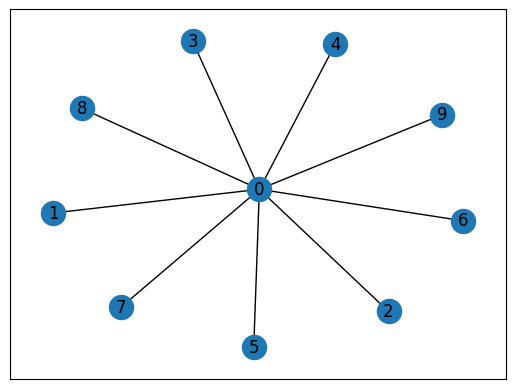

In [4]:
A = nx.star_graph(9)
nx.draw_networkx(A)

In [5]:
A.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [6]:
A.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)])

Dicionário com o grau de cada um dos nós

In [7]:
A.degree

DegreeView({0: 9, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})

In [8]:
A.degree[0]

9

In [9]:
A.degree[1]

1

In [10]:
for node, degree in A.degree:
  print(f"Nó: {node}; Grau: {degree}")

Nó: 0; Grau: 9
Nó: 1; Grau: 1
Nó: 2; Grau: 1
Nó: 3; Grau: 1
Nó: 4; Grau: 1
Nó: 5; Grau: 1
Nó: 6; Grau: 1
Nó: 7; Grau: 1
Nó: 8; Grau: 1
Nó: 9; Grau: 1


In [11]:
for node, degree in A.degree:
  if degree > 1:
    print(f"Nó: {node}; Grau: {degree}")

Nó: 0; Grau: 9


In [12]:
list(A.adj[0])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
list(A.adj[1])

[0]

Rede direcionada

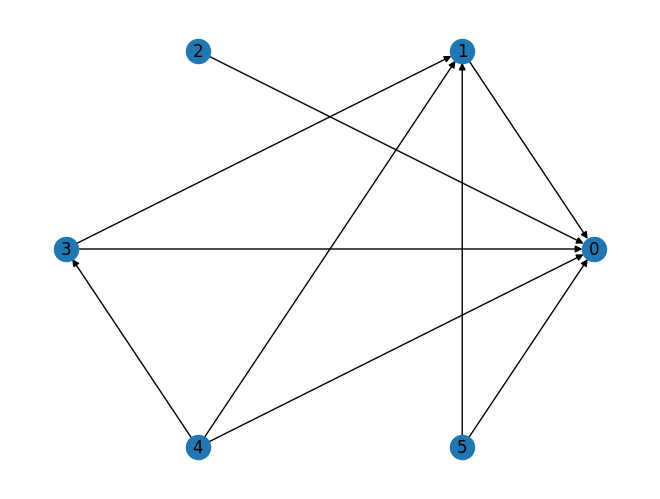

In [14]:
B = nx.gnc_graph(6)
nx.draw_circular(B, with_labels=True)

In [15]:
B.degree(0)

5

In [16]:
B.in_degree(0)

5

In [17]:
B.out_degree(0)

0

Lista com adjacências

In [20]:
list(B.adj[0])

[]

Lista com antecessores

In [22]:
B.pred[0]

AtlasView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}})

In [23]:
B.degree(2)

1

In [24]:
B.in_degree(2)

0

In [25]:
B.out_degree(2)

1

Redes com pesos

In [33]:
C = nx.path_graph(range(5))
nx.set_edge_attributes(C, 1, 'weight')
C.add_edge(2, 4, weight=2)
C[2][3]['weight'] = 3

{(0, 1): Text(0.16002492613073704, -0.7139004403089374, '1'),
 (1, 2): Text(0.01705494463218293, -0.09080648108722233, '1'),
 (2, 3): Text(-0.19030727425538427, 0.3798178917996034, '3'),
 (2, 4): Text(-1.5607927979603697e-05, 0.4571765077310492, '2'),
 (3, 4): Text(-0.12972697007811024, 0.5908064810872224, '1')}

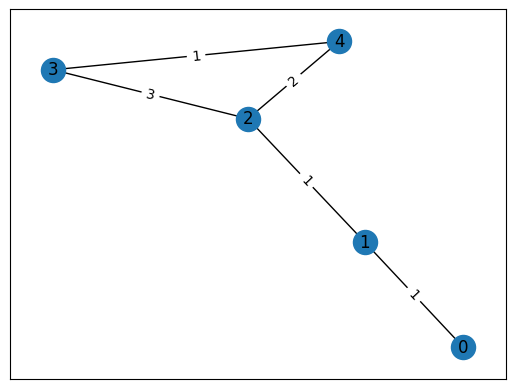

In [34]:
pos = nx.spring_layout(C)
labels = nx.get_edge_attributes(C, 'weight')
nx.draw_networkx(C, pos)
nx.draw_networkx_edge_labels(C, pos, edge_labels=labels)

Informas os atributos que guarda os pesos

In [35]:
C.degree(2, weight='weight')

6

In [36]:
C.degree(3, weight='weight')

4

In [37]:
C.degree(0, weight='weight')

1

## Estatísticas de grau

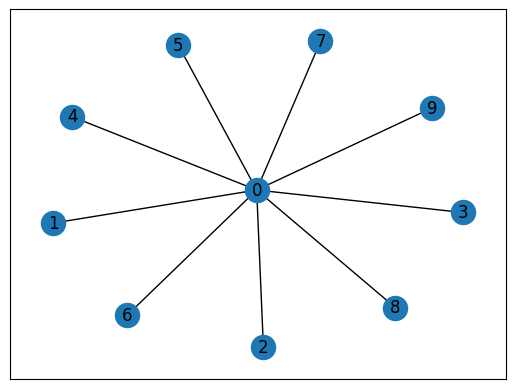

In [38]:
D = nx.star_graph(9)
nx.draw_networkx(D)

In [39]:
degree_list = []
for node, degree in D.degree:
    degree_list.append(degree)
degree_list

[9, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [40]:
degree_list = [degree for node, degree in D.degree]
degree_list

[9, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [42]:
max(degree_list)

9

In [43]:
min(degree_list)

1

In [44]:
np.mean(degree_list)

1.8

In [46]:
np.std(degree_list)

2.4000000000000004

COnferindo grafo completo

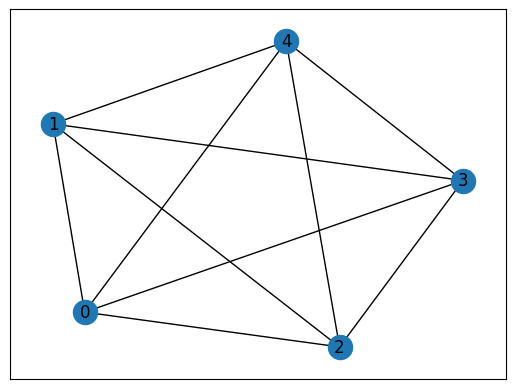

In [49]:
E = nx.complete_graph(5)
nx.draw_networkx(E)

In [50]:
degree_list = [degree for node, degree in E.degree]
max(degree_list), min(degree_list), np.mean(degree_list), np.std(degree_list)

(4, 4, 4.0, 0.0)

## Distribuição empírica

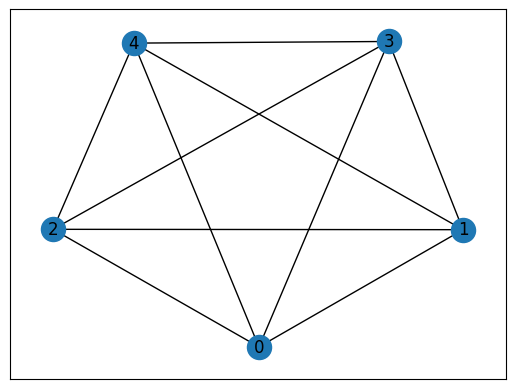

In [51]:
F = nx.complete_graph(5)
nx.draw_networkx(F)

(array([0., 0., 0., 0., 0., 5., 0., 0., 0., 0.]),
 array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5]),
 <BarContainer object of 10 artists>)

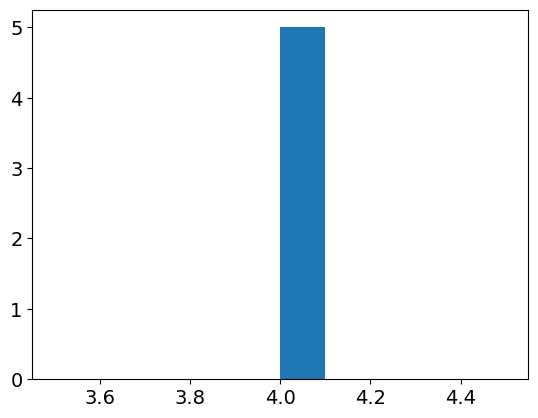

In [52]:
degree_list = [degree for node, degree in F.degree]
plt.hist(degree_list)

Usando degree_histogram do nx numa função

In [54]:
def plot_degree(graph):
  y = nx.degree_histogram(graph)
  x = range(len(y))
  plt.bar(x, y)
  plt.xlabel('Grau')
  plt.ylabel('Frequência')
  plt.title('Distribuição dos graus')

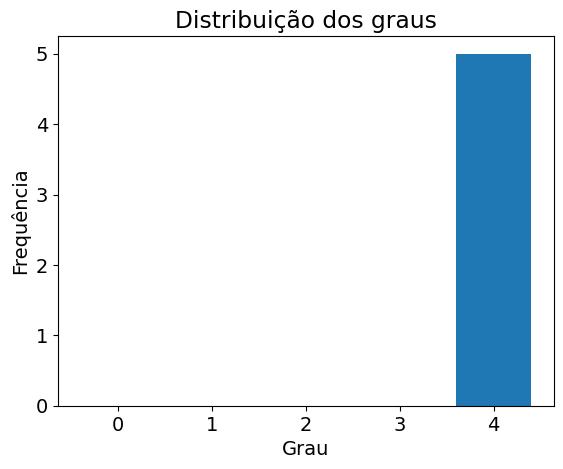

In [55]:
plot_degree(F)

Testando o histograma com outras redes

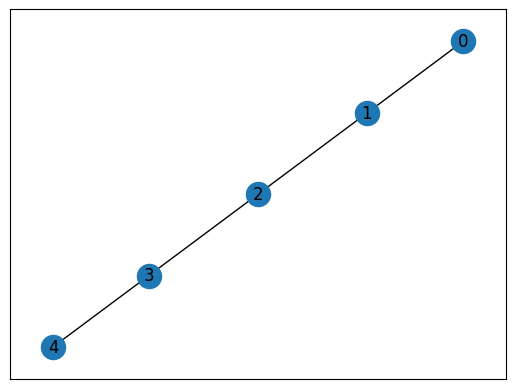

In [56]:
G = nx.path_graph(5)
nx.draw_networkx(G)

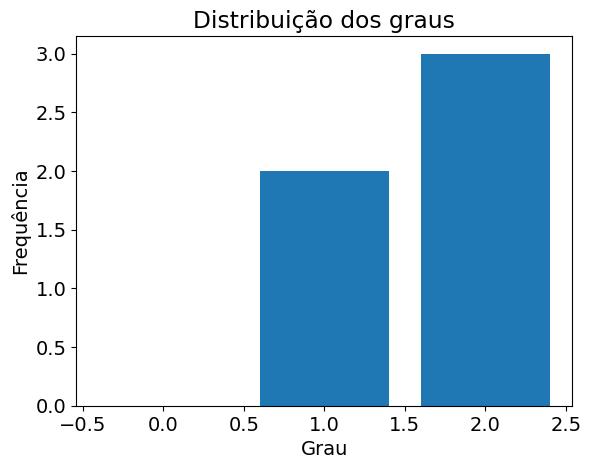

In [57]:
plot_degree(G)

Gráfico de ranqueamento

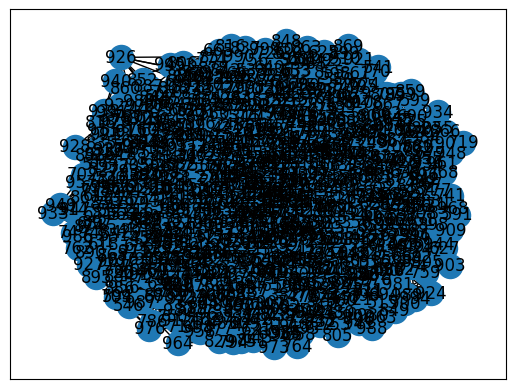

In [59]:
H = nx.barabasi_albert_graph(1000, 10, seed=42)
nx.draw_networkx(H)

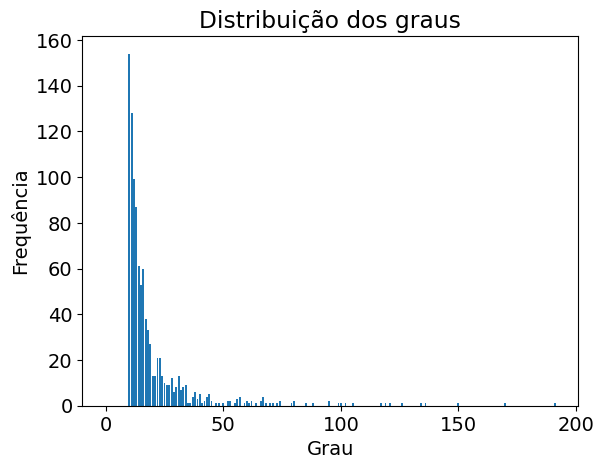

In [60]:
plot_degree(H)

In [61]:
degree_list = [ degree for node, degree in H.degree]
sorted_degree_list = sorted(degree_list, reverse=True)
sorted_degree_list[:10]

[191, 170, 150, 136, 134, 126, 121, 119, 117, 105]

Text(0, 0.5, 'Grau')

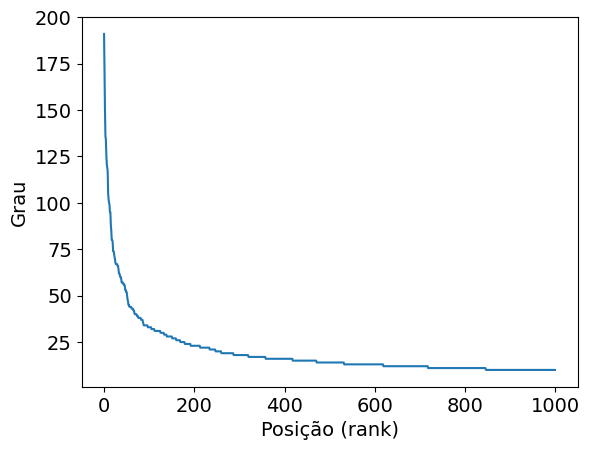

In [62]:
y = sorted_degree_list
x = range(len(y))
plt.plot(x, y)
plt.xlabel('Posição (rank)')
plt.ylabel('Grau')

[]

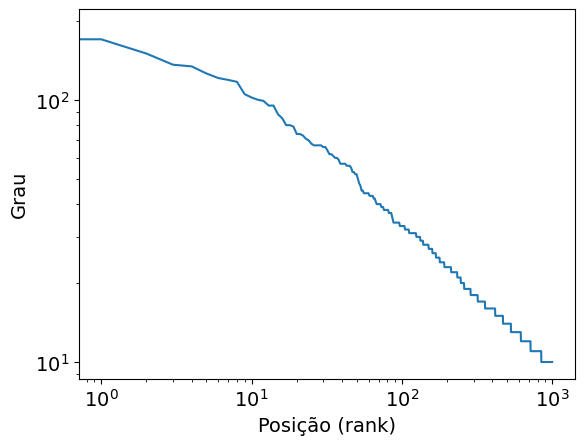

In [63]:
plt.plot(x, y)
plt.xlabel('Posição (rank)')
plt.ylabel('Grau')
plt.loglog()

In [66]:
def plot_rank(graph, log=False):
    degree_list = [ degree for node, degree in graph.degree]
    y = sorted(degree_list, reverse=True)
    x = range(len(y))
    plt.plot(x, y, marker='o')
    plt.xlabel('Posição (rank)')
    plt.ylabel('Grau')
    if log:
      plt.loglog()

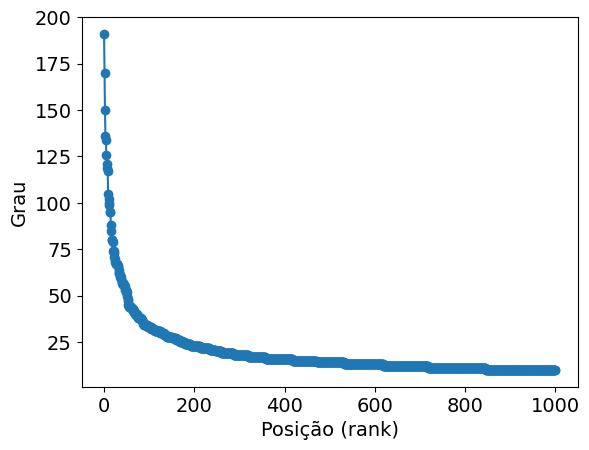

In [67]:
plot_rank(H)

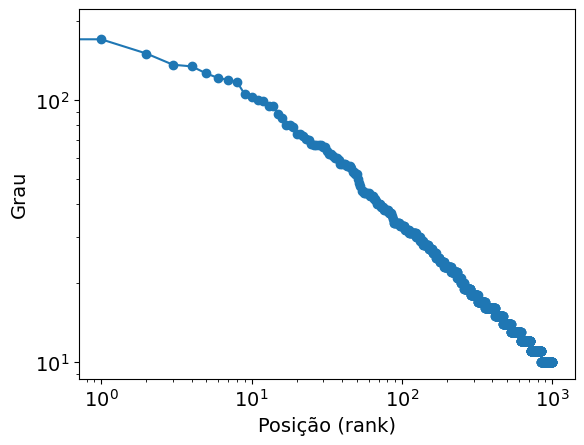

In [68]:
plot_rank(H, log=True)

## Exemplos de redes

Clube de Karatê

In [69]:
K = nx.karate_club_graph()
print(K)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


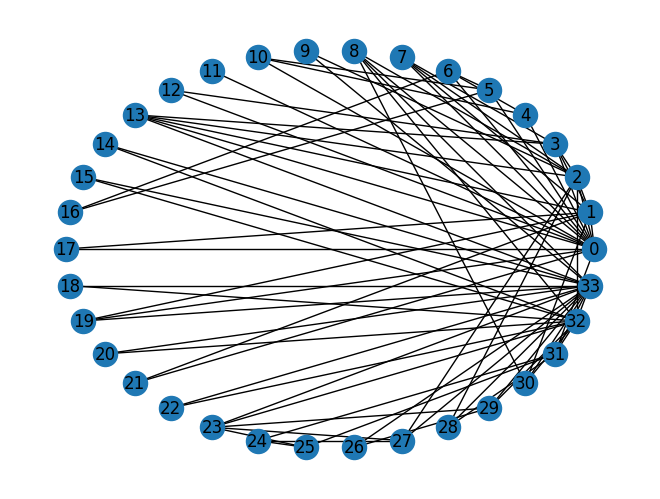

In [70]:
nx.draw_circular(K, with_labels=True)

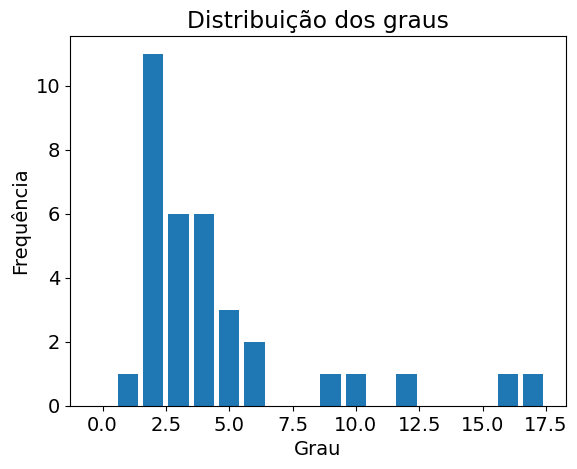

In [71]:
plot_degree(K)

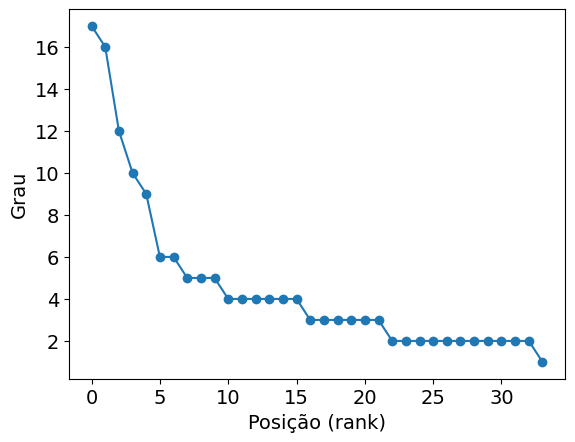

In [72]:
plot_rank(K)

Sistemas autônomos de internet

In [74]:
I = nx.random_internet_as_graph(500, seed=42)
print(I)

Graph with 500 nodes and 715 edges


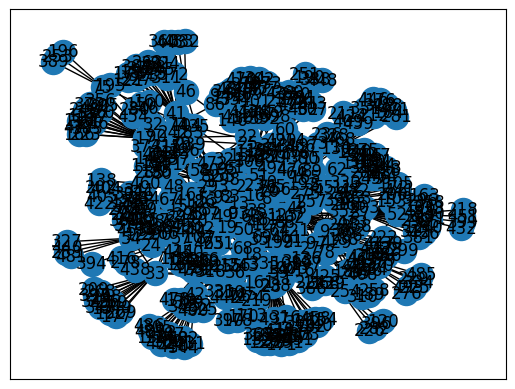

In [76]:
nx.draw_networkx(I)

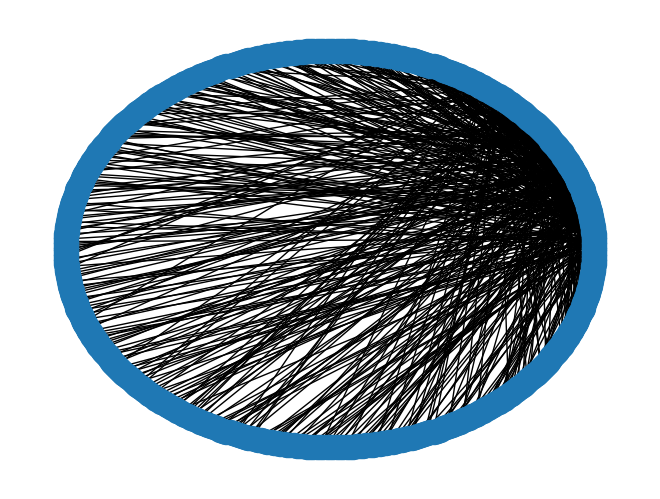

In [77]:
nx.draw_circular(I)

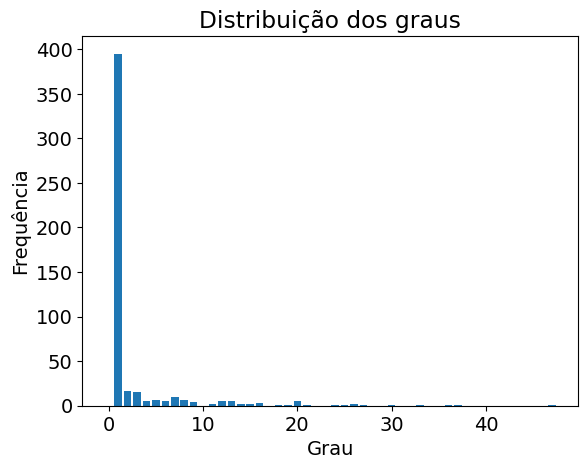

In [78]:
plot_degree(I)

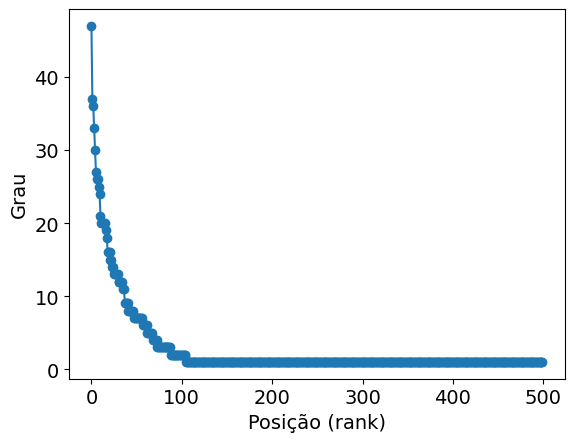

In [79]:
plot_rank(I)

Les Misérable

In [80]:
M = nx.les_miserables_graph()
print(M)

Graph with 77 nodes and 254 edges


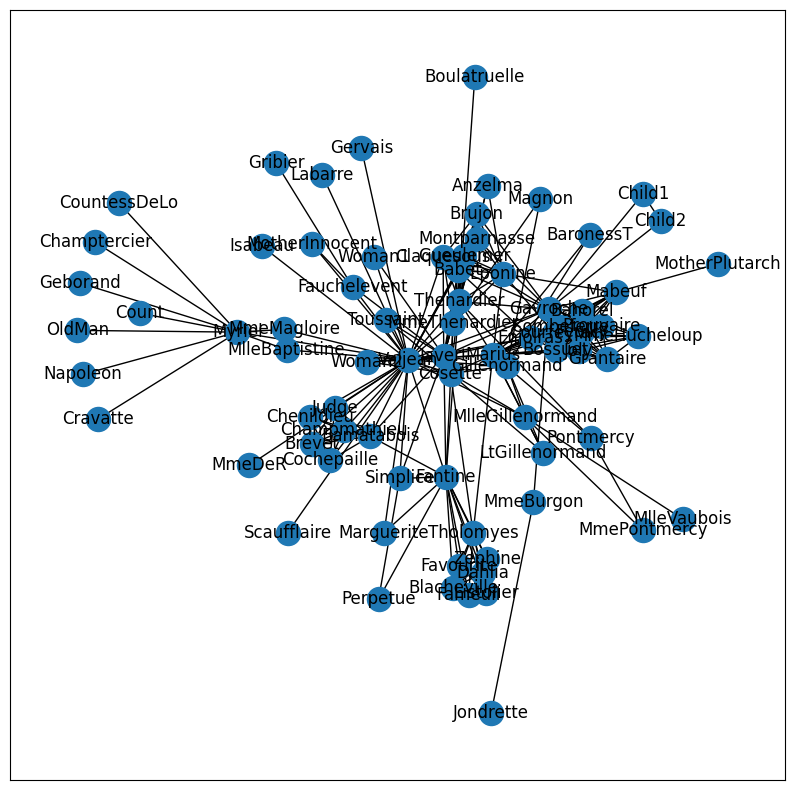

In [81]:
plt.figure(figsize=(10, 10))
nx.draw_networkx(M)

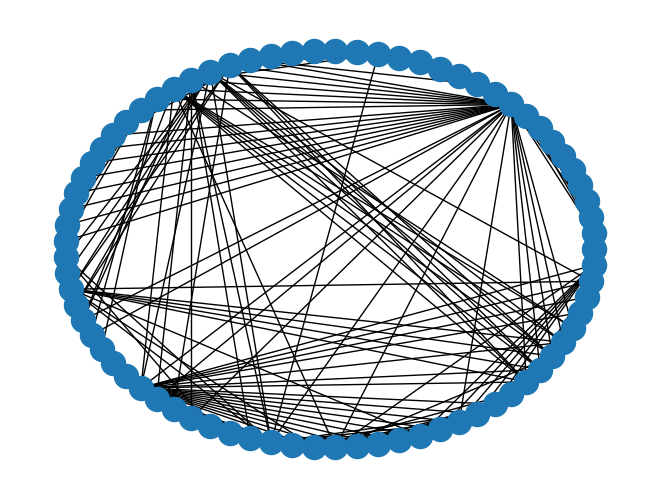

In [82]:
nx.draw_circular(M)

In [83]:
M.degree('Valjean')

36

In [86]:
M.degree('Cosette')

11

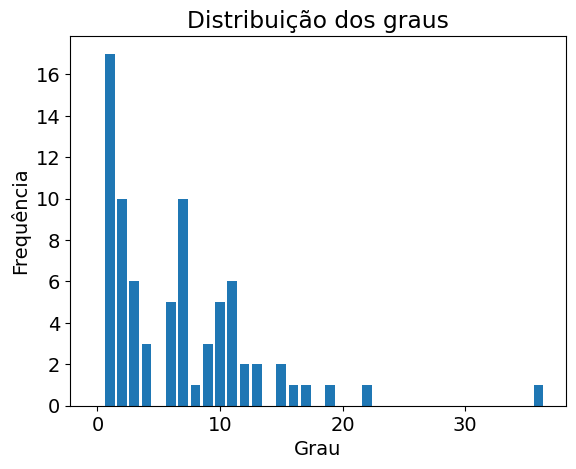

In [84]:
plot_degree(M)

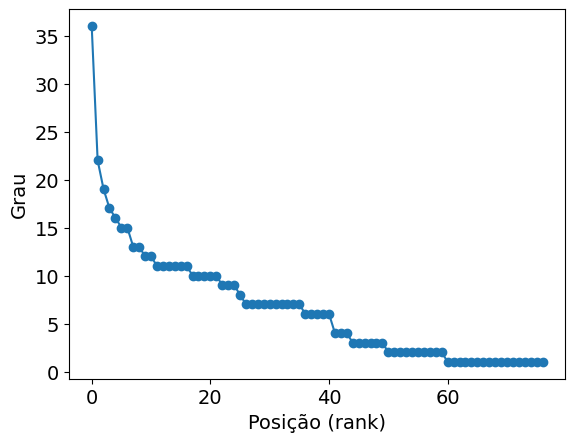

In [85]:
plot_rank(M)

In [87]:
M.degree('Valjean', weight='weight')

158

In [90]:
def plot_rank_weight(graph, log=False, weight=''):
    degree_list = [ degree for node, degree in graph.degree(weight=weight)]
    y = sorted(degree_list, reverse=True)
    x = range(len(y))
    plt.plot(x, y, marker='o')
    plt.xlabel('Posição (rank)')
    plt.ylabel('Grau')
    if log:
      plt.loglog()

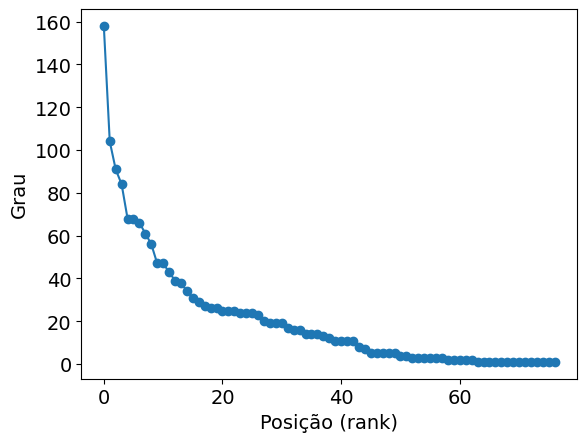

In [91]:
plot_rank_weight(M, weight='weight')